In [137]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Analyse initiale

In [138]:
data = pd.read_csv('./data/bank-full.csv', sep=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [139]:
data['y'].replace(['yes', 'no'],[1, 0], inplace=True)

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [140]:
data = data.drop(labels=['default', 'contact', 'day', 'month', 'campaign', 'previous', 'poutcome', 'pdays'], axis=1)

data

,age,job,marital,education,balance,housing,loan,duration,y
0,58,management,married,tertiary,2143,yes,no,261,0
1,44,technician,single,secondary,29,yes,no,151,0
2,33,entrepreneur,married,secondary,2,yes,yes,76,0
3,47,blue-collar,married,unknown,1506,yes,no,92,0
4,33,unknown,single,unknown,1,no,no,198,0
...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,977,1
45207,71,retired,divorced,primary,1729,no,no,456,1
45208,72,retired,married,secondary,5715,no,no,1127,1
45209,57,blue-collar,married,secondary,668,no,no,508,0


In [141]:
data.describe()

,age,balance,duration,y
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,0.116985
std,10.618762,3044.765829,257.527812,0.321406
min,18.000000,-8019.000000,0.000000,0.000000
25%,33.000000,72.000000,103.000000,0.000000
50%,39.000000,448.000000,180.000000,0.000000
75%,48.000000,1428.000000,319.000000,0.000000
max,95.000000,102127.000000,4918.000000,1.000000


In [142]:
data.describe(include=['O'])

,job,marital,education,housing,loan
count,45211,45211,45211,45211,45211
unique,12,3,4,2,2
top,blue-collar,married,secondary,yes,no
freq,9732,27214,23202,25130,37967


<AxesSubplot:ylabel='Frequency'>

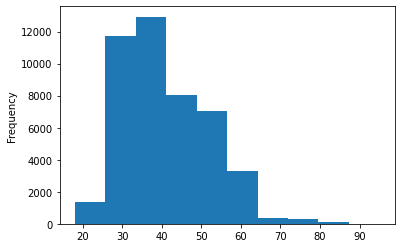

In [143]:
data.age.plot.hist()

In [144]:
data.y.value_counts(normalize=True) * 100

0    88.30152
1    11.69848
Name: y, dtype: float64

In [145]:
data.education.value_counts(normalize=True) * 100

secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64

In [146]:
pd.crosstab(data['job'], data['y'], normalize=True, margins=True) * 100

y,0,1,All
job,,,
admin.,10.041804,1.395678,11.437482
blue-collar,19.959744,1.565991,21.525735
entrepreneur,3.016965,0.272058,3.289023
housemaid,2.501604,0.241092,2.742695
management,18.042069,2.877618,20.919688
retired,3.866316,1.141315,5.007631
self-employed,3.078897,0.413616,3.492513
services,8.371856,0.816173,9.188029
student,1.479728,0.594988,2.074716


# KMEANS (à finir)

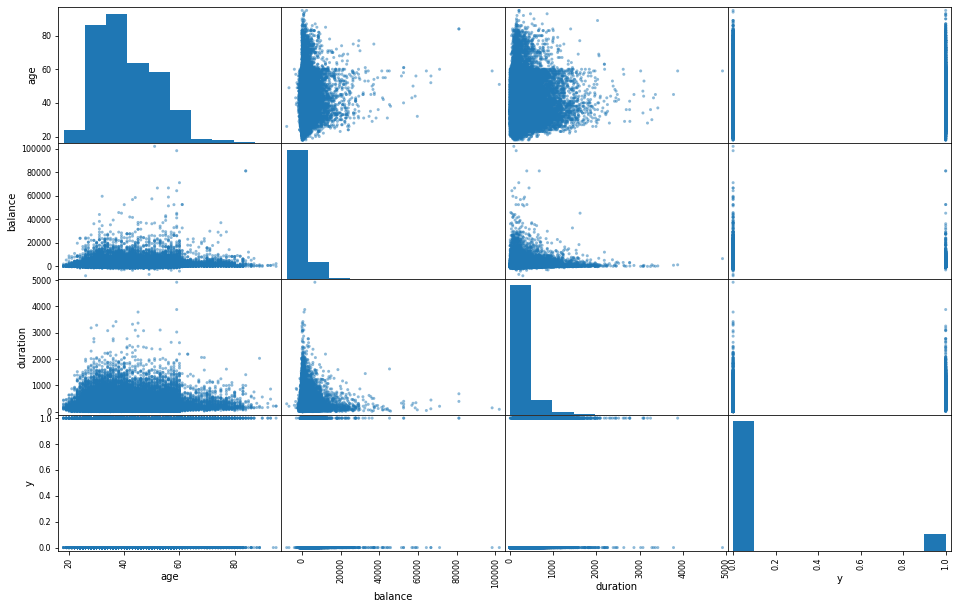

In [147]:
# useless ?
from pandas.plotting import scatter_matrix

scatter_mat = scatter_matrix(data, figsize=(16,10))

In [148]:
data.corr()

,age,balance,duration,y
age,1.000000,0.097783,-0.004648,0.025155
balance,0.097783,1.000000,0.021560,0.052838
duration,-0.004648,0.021560,1.000000,0.394521
y,0.025155,0.052838,0.394521,1.000000


# Decision Tree

In [149]:
from sklearn.preprocessing import LabelEncoder
for col in data.columns : 
    if data[col].dtypes == 'object' : 
        print(col)
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

job
marital
education
housing
loan


In [150]:
x = data.drop(labels='y', axis=1)
y = data['y']

print(x)
print(y)

       age  job  marital  education  balance  housing  loan  duration
0       58    4        1          2     2143        1     0       261
1       44    9        2          1       29        1     0       151
2       33    2        1          1        2        1     1        76
3       47    1        1          3     1506        1     0        92
4       33   11        2          3        1        0     0       198
...    ...  ...      ...        ...      ...      ...   ...       ...
45206   51    9        1          2      825        0     0       977
45207   71    5        0          0     1729        0     0       456
45208   72    5        1          1     5715        0     0      1127
45209   57    1        1          1      668        0     0       508
45210   37    2        1          1     2971        0     0       361

[45211 rows x 8 columns]
0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Leng

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [152]:
y_test

14897    0
41970    0
4447     0
44939    0
30858    0
        ..
18777    0
13157    0
32848    0
6616     0
10925    0
Name: y, Length: 11303, dtype: int64

In [166]:
y_train.value_counts(normalize=True) * 100

0    88.229916
1    11.770084
Name: y, dtype: float64

In [167]:
y_test.value_counts(normalize=True) * 100 

0    88.516323
1    11.483677
Name: y, dtype: float64

In [155]:
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(x,y, stratify=y, random_state=42)

In [156]:
x_train_st

,age,job,marital,education,balance,housing,loan,duration
24915,58,4,1,2,0,1,0,265
11794,47,7,0,1,287,0,0,63
1279,35,4,2,2,797,1,0,81
913,34,0,0,1,627,1,0,283
5554,35,0,2,1,91,1,0,185
...,...,...,...,...,...,...,...,...
10010,41,4,2,2,1113,1,1,388
26216,40,7,2,1,1547,1,0,405
15941,36,0,2,1,22,1,0,77
16952,45,1,1,1,79,1,0,98


In [157]:
y_train_st.value_counts(normalize=True)

0    0.883007
1    0.116993
Name: y, dtype: float64

In [158]:
y_test_st.value_counts(normalize=True)

0    0.88304
1    0.11696
Name: y, dtype: float64

## Building decision tree

In [159]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)

tree.fit(x_train_st, y_train_st)

DecisionTreeClassifier(random_state=42)

In [160]:
data.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
duration     0
y            0
dtype: int64

In [162]:
y_prediction = tree.predict(x_test_st)
y_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [163]:
y_test_st.values

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [164]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_st, y_prediction)
conf_matrix

precision = conf_matrix.diagonal().sum()/conf_matrix.sum()

precision * 100

84.26966292134831

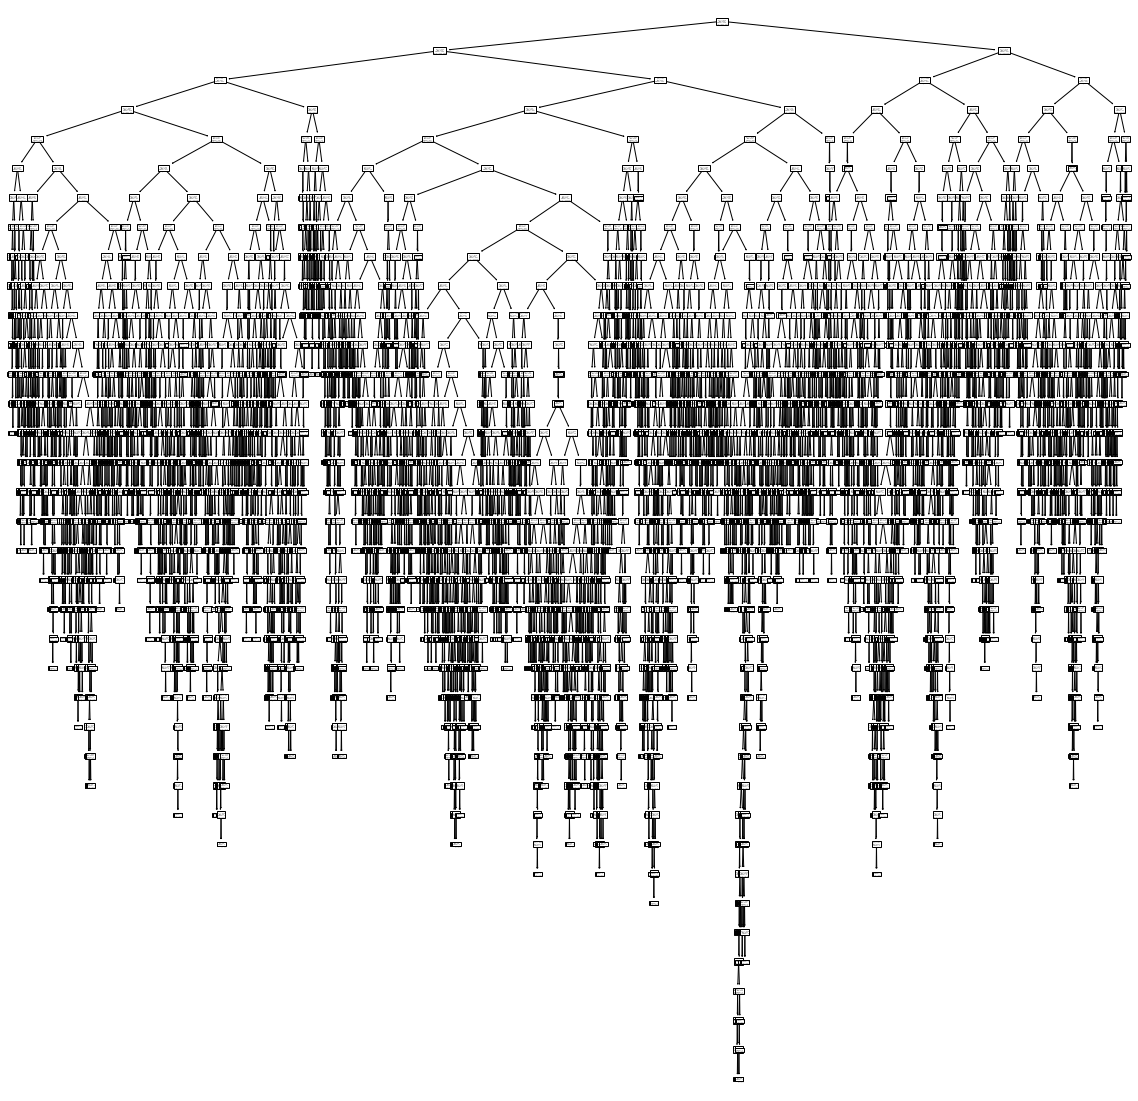

In [165]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20, 20))
data_tree = plot_tree(tree)

# illisible mais lisible ci dessous car optimisé

In [127]:
scores=[]
for max_depth in range(2, 10) : 
    tree=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(x_train_st, y_train_st)
    score=tree.score(x_test_st, y_test_st)
    scores.append(score)

In [128]:
scores

[0.8877289215252587,
 0.8877289215252587,
 0.8855171193488455,
 0.8886136423958241,
 0.8847208705653367,
 0.8854286472617889,
 0.88693267274175,
 0.8840130938688844]

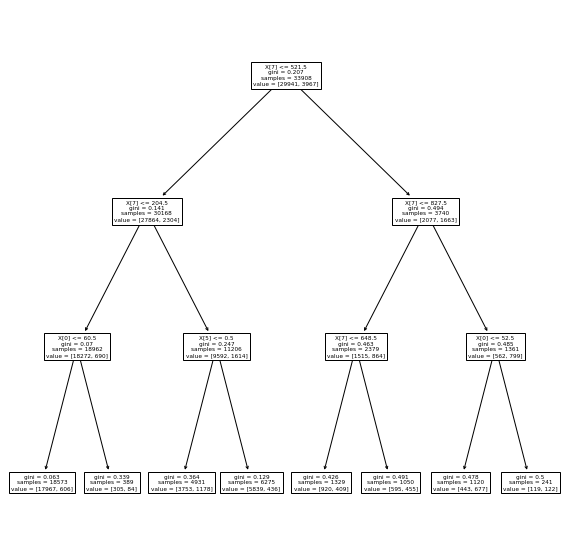

In [133]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(x_train_st, y_train_st)
plt.figure(figsize = (10, 10))
tree_bank = plot_tree(tree)

In [134]:
from sklearn.tree import export_text
tree_rules = export_text(tree, feature_names=x_train_st.columns.values.tolist())
print(tree_rules)

|--- duration <= 521.50
|   |--- duration <= 204.50
|   |   |--- age <= 60.50
|   |   |   |--- class: 0
|   |   |--- age >  60.50
|   |   |   |--- class: 0
|   |--- duration >  204.50
|   |   |--- housing <= 0.50
|   |   |   |--- class: 0
|   |   |--- housing >  0.50
|   |   |   |--- class: 0
|--- duration >  521.50
|   |--- duration <= 827.50
|   |   |--- duration <= 648.50
|   |   |   |--- class: 0
|   |   |--- duration >  648.50
|   |   |   |--- class: 0
|   |--- duration >  827.50
|   |   |--- age <= 52.50
|   |   |   |--- class: 1
|   |   |--- age >  52.50
|   |   |   |--- class: 1

